In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = {
    'Age': [19, 14, 30, 35, 40, 40, 31, 12, 16, 40, 18, 28, 28, 45],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'Martial_Status': ['Single', 'Marride', 'Single', 'Single', 'Single', 'Marride', 'Marride', 'Single', 'Marride', 'Single', 'Marride', 'Marride', 'Single', 'Marride'],
    'Buys': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']  
}

df = pd.DataFrame(data=data)

df.head()

,Age,Income,Gender,Martial_Status,Buys
0,19,High,Male,Single,No
1,14,High,Male,Marride,No
2,30,High,Male,Single,Yes
3,35,Medium,Male,Single,Yes
4,40,Low,Female,Single,Yes


<AxesSubplot:xlabel='Buys', ylabel='count'>

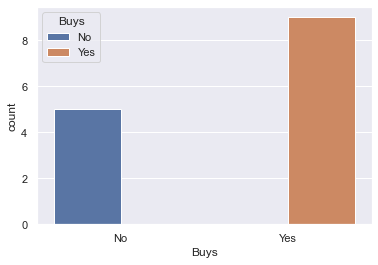

In [3]:
sns.set()
sns.countplot(x ='Buys', hue=df['Buys'], data = df)

In [4]:
# label them
from sklearn.preprocessing import LabelEncoder

cols = ['Income', 'Gender', 'Martial_Status']
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,Age,Income,Gender,Martial_Status,Buys
0,19,0,1,1,No
1,14,0,1,0,No
2,30,0,1,1,Yes
3,35,2,1,1,Yes
4,40,1,0,1,Yes


In [5]:
# splite data
X = df.drop(columns=['Buys'])
y = df['Buys']
X.shape, y.shape

((14, 4), (14,))

In [6]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
xtrainPred = model.predict(X_train)
xtrainAccu = accuracy_score(y_train, xtrainPred)

print(xtrainAccu)

1.0


# Test it with the data that the model has not seen it before........

In [8]:
print(X_test)

    Age  Income  Gender  Martial_Status
7    12       2       1               1
9    40       2       0               1
12   28       0       0               1


In [9]:
xtestPred = model.predict(X_test)
xtestAccu = accuracy_score(y_test, xtestPred)
print(xtestAccu)

1.0


In [10]:
confusion_matrix(y_test, xtestPred)

array([[1, 0],
       [0, 2]])

# Test it with new input

In [11]:
newInput = (11, 0, 1, 1) # result should be 0
newInput = np.asarray(newInput)
reshaped_input = newInput.reshape(1, -1)

prediction = model.predict(reshaped_input)
print(prediction)

['No']


In [12]:
input2 = (56, 1, 0, 1) # result should be 1
input2 = np.asarray(input2)
reshaped_input2 = input2.reshape(1, -1)

prediction = model.predict(reshaped_input2)
print(prediction)

['Yes']


In [13]:
" I THINK DT model is the best cuz we can come up with d/t if condition like --> if the age is > or < or >= e.t.c"

' I THINK DT model is the best cuz we can come up with d/t if condition like --> if the age is > or < or >= e.t.c'

In [14]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))

all_scores = pd.DataFrame(np.zeros((len(models), 3)))
all_scores.columns = ['train_score', 'test_score', 'confusionMatrix']
all_scores.index = [name for name, model in models]

train_score_acc = []
test_score_acc = []
confusionMatrix = []

for name, model in models:
    model.fit(X_train, y_train)
    
    xtrainpred = model.predict(X_train)
    xtrainaccu = accuracy_score(y_train, xtrainpred)

    xtestpred = model.predict(X_test)
    xtestaccu = accuracy_score(y_test, xtestpred)
    
    train_score_acc.append(round(xtrainaccu, 3))
    test_score_acc.append(round(xtestaccu, 3))
    confusionMatrix.append(confusion_matrix(y_test, xtestpred))

all_scores['confusionMatrix'] = confusionMatrix
all_scores['train_score'] = train_score_acc
all_scores['test_score'] = test_score_acc

all_scores

,train_score,test_score,confusionMatrix
LR,0.636,0.667,"[[0, 1], [0, 2]]"
KNN,0.636,0.667,"[[0, 1], [0, 2]]"
SVM,0.636,0.667,"[[0, 1], [0, 2]]"
DT,1.000,1.000,"[[1, 0], [0, 2]]"


# accuracy can be Rabish  --------------> make sure u check the percision and recall